In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [130]:
class LogisticRegressionn:
    def __init__(self,x,y):      
        self.intercept = np.ones((x.shape[0], 1))  
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
         
    #Sigmoid method
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
     
    #Loss function
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
     
    #Gradient descent
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
        # X is the learning rate
 
    #fit method 
    def fit(self, lr , iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
            loss = self.loss(sigma,self.y)
            dW = self.gradient_descent(self.x , sigma, self.y)
             
            #Updating the weights
            self.weight -= lr * dW
 
        return print('Fitted successfully to Data')
     
    #Predict the class label.
    def predict(self, x_test , threshold):
        x_test = np.concatenate((np.ones((x_test.shape[0], 1)) , x_test), axis=1)
        result = self.sigmoid(x_test, self.weight)
        
        result = result >= threshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True: 
                y_pred[i] = 1
            else:
                continue
                 
        return y_pred

In [131]:
#Helping Functions
def read_data(path):
    return pd.read_csv(path, index_col=0)

In [133]:
#Train dataset
dataframe=read_data('data.csv')

x_train=dataframe[dataframe.columns.drop('diagnosis')]
y_train=dataframe['diagnosis']

print(dataframe.shape)
print(x_train.shape)
print(y_train.shape)


(569, 17)
(569, 16)
(569,)


In [134]:
#Encoding categorical data values
labelencoder_Y = LabelEncoder()
y_train = labelencoder_Y.fit_transform(y_train)
# print(y_train)

In [135]:
#Trian Test Split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=0)

In [136]:
#Feature Scaling - fits within a specific scale, like 0–100 or 0–1
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [137]:
#Model Prediction
lg = LogisticRegressionn(x_train,y_train)
lg.fit(0.1 , 5000)

y_pred = lg.predict(x_test, 0.5)
print(y_pred.shape)
print(y_test.shape)


<ipython-input-130-596f17576afd>:15: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
<ipython-input-130-596f17576afd>:15: RuntimeWarning: invalid value encountered in multiply
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


Fitted successfully to Data
(143,)
(143,)


In [138]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test,y_pred))
#R2 Score
print('R2 Score: %.2f' % r2_score(y_test,y_pred))

Mean squared error: 0.06
R2 Score: 0.76


Text(0.5, 1.0, 'First 100 actual and Predicted values')

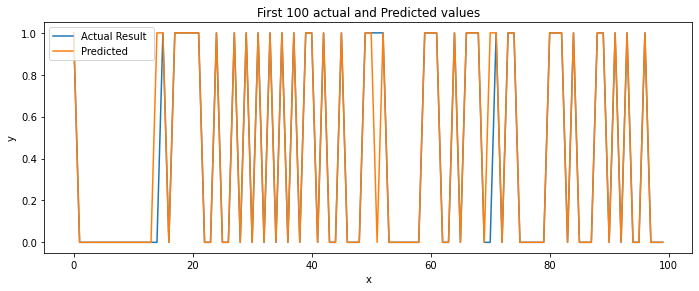

In [139]:
# Visualization
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.5, 0.8])
axes.plot(y_test[0:100], label="Actual Result ")
axes.plot(y_pred[0:100], label="Predicted")

axes.legend(loc=2); # upper left corner
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('First 100 actual and Predicted values')